# 准备工作

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

df = pd.read_csv("E://datawhle1/CDNOW.txt",header=None,delimiter="\s+",
                names=['Id','Date','Units','Price'])
df['Date'] = pd.to_datetime(df['Date'],format="%Y%m%d")
df['Month'] = df['Date'].values.astype('datetime64[M]')
df['Amount'] = df['Price']*df['Units']

# 商品销售静态分析

* 各订单购买数量分析

In [32]:
df['Units'].describe()

count    69659.000000
mean         2.410040
std          2.333924
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         99.000000
Name: Units, dtype: float64

* 各订单购买金额分析

In [50]:
tmp = df['Units']*df['Price']
tmp.describe()

count     69659.000000
mean        162.834814
std         864.312155
min           0.000000
25%          14.770000
50%          48.960000
75%         125.730000
max      127314.990000
dtype: float64

# 商品销售动态分析

* 订单数量趋势分析

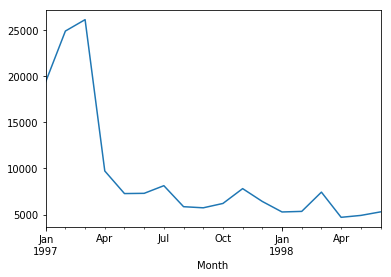

In [37]:
df.groupby(['Month'])['Units'].sum().plot()

* 订单金额趋势分析

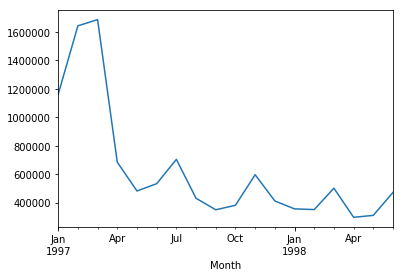

In [39]:
df.groupby(['Month'])['Amount'].sum().plot()

* 异常点检测

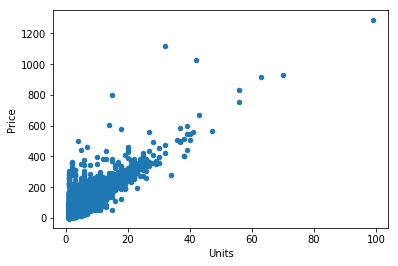

In [40]:
df.plot.scatter(x='Units',y='Price')

* 总结：订单金额和订单数量以月为单位作图，走势大致一致，在三月时迅速下跌；由每笔订单散点图可知数据集中，无较多异常点

# 用户消费行为静态分析 

### 用户购买数量分析

* 用户累计购买数量分析

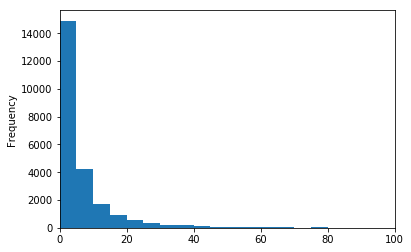

In [55]:
df.groupby(['Id']).sum().Units.plot(kind='hist',bins=np.arange(0,100,5),xlim=(0,100))

* 用户购买数量累计贡献分析

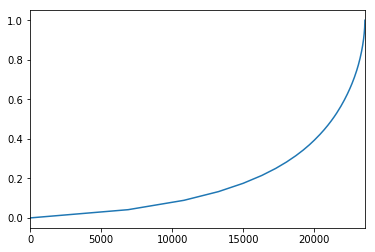

In [153]:
user_amount = df.groupby('Id').Units.sum().sort_values().reset_index() # 排序
user_amount['amount_cumsum'] = user_amount.Units.cumsum() # 累加
user_amount['prop'] = user_amount.apply(lambda x:x.amount_cumsum/user_amount.amount_cumsum.max(),axis=1) # 求概率分布
user_amount.prop.plot()

* 用户最大单笔购买数量分析

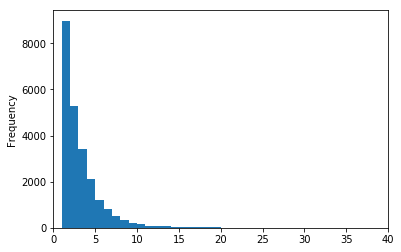

In [61]:
df.groupby(['Id']).max().Units.plot(kind='hist',bins=np.arange(0,40,1),xlim=(0,40))

### 各用户购买金额分析

* 各用户累计购买金额分析 

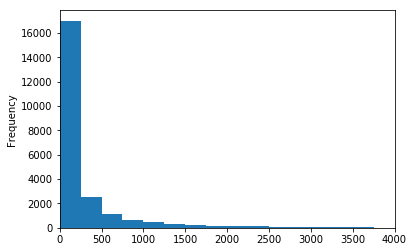

In [69]:
df.groupby(['Id']).sum().Amount.plot(kind='hist',bins=np.arange(0,4000,250),xlim=(0,4000))

* 用户购买金额累计贡献分析

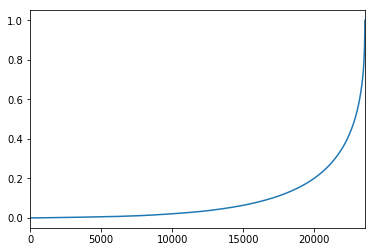

In [156]:
user_amount = df.groupby('Id').Amount.sum().sort_values().reset_index() # 排序
user_amount['amount_cumsum'] = user_amount.Amount.cumsum() # 累加
user_amount['prop'] = user_amount.apply(lambda x:x.amount_cumsum/user_amount.amount_cumsum.max(),axis=1) 
user_amount.prop.plot()

* 各用户最大单笔消费金额分析

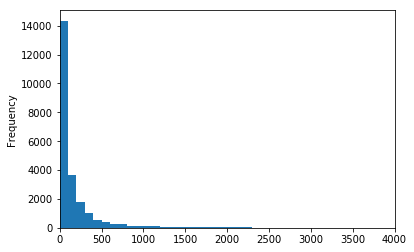

In [71]:
df.groupby(['Id']).max().Amount.plot(kind='hist',bins=np.arange(0,4000,100),xlim=(0,4000))

### 各用户购买次数分析

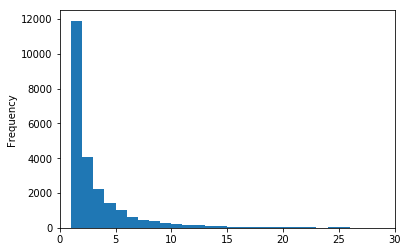

In [75]:
df.groupby(['Id']).count()['Date'].plot(kind='hist',bins=np.arange(0,30,1),xlim=(0,30))

# 用户消费行为动态分析

* 第一次购买时间分析

In [84]:
df.groupby(['Id']).Month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: Month, dtype: int64

* 最后一次购买时间分析

In [85]:
df.groupby(['Id']).Month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: Month, dtype: int64

* 最后一次消费至今时间间隔（年代久远，此题略过）

* 各用户生命周期分析

In [86]:
(df.groupby('Id').Date.max() - 
 df.groupby('Id').Date.min()).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: Date, dtype: object

* 用户首次回购周期(只统计有过回购的客户）

In [118]:
df['Purchase'] = df['Id'].map((df.groupby('Id').count().Date))
(df[df.Purchase>=1].groupby('Id').Date.nth(2) - 
 df[df.Purchase>=1].groupby('Id').Date.nth(1)).describe()

count                       7583
mean     88 days 19:01:28.777528
std      97 days 16:23:16.794689
min              0 days 00:00:00
25%             17 days 00:00:00
50%             50 days 00:00:00
75%            130 days 00:00:00
max            512 days 00:00:00
Name: Date, dtype: object

* 用户平均购买周期

In [119]:
df.groupby('Id').apply(lambda x:(x.Date.max()-x.Date.min())/x.Purchase)

Id          
1      0               0 days 00:00:00
2      1               0 days 00:00:00
       2               0 days 00:00:00
3      3              85 days 04:00:00
       4              85 days 04:00:00
       5              85 days 04:00:00
       6              85 days 04:00:00
       7              85 days 04:00:00
       8              85 days 04:00:00
4      9              86 days 06:00:00
       10             86 days 06:00:00
       11             86 days 06:00:00
       12             86 days 06:00:00
5      13      33 days 08:43:38.181818
       14      33 days 08:43:38.181818
       15      33 days 08:43:38.181818
       16      33 days 08:43:38.181818
       17      33 days 08:43:38.181818
       18      33 days 08:43:38.181818
       19      33 days 08:43:38.181818
       20      33 days 08:43:38.181818
       21      33 days 08:43:38.181818
       22      33 days 08:43:38.181818
       23      33 days 08:43:38.181818
6      24              0 days 00:00:00
7      25   

* 用户各月复购率（计算的是整体的各月复购率）

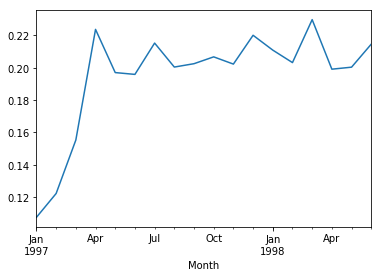

In [121]:
pivoted_counts = df.pivot_table(index='Id',columns='Month',
                                values='Date',aggfunc='count').fillna(0)
pivoted_counts_tran = pivoted_counts.applymap(
    lambda x: 1 if x > 1 else np.NaN if x == 0 else 0)
(pivoted_counts_tran.sum()/pivoted_counts_tran.count()).plot()

* 各月留存率

In [150]:
user_purchase = df[['Id','Price','Units','Date']]
user_retention = pd.merge(left=user_purchase,right=df.groupby('Id').Date.min().reset_index(),
                          how='inner',on='Id',suffixes=('_max','_min'))
user_retention['diff'] = (user_purchase['Date'] - 
                          user_retention['Date_min']).apply(lambda x:x/np.timedelta64(1,'D'))
user_retention['diff_bin']= pd.cut(user_retention['diff'],bins=[0,3,7,15,60,90,180,365])
user_retention.describe()

,Id,Price,Units,diff
count,69659.000000,69659.000000,69659.000000,69659.000000
mean,11470.854592,35.893648,2.410040,140.905942
std,6819.904848,36.281942,2.333924,159.163562
min,1.000000,0.000000,1.000000,0.000000
25%,5506.000000,14.490000,1.000000,0.000000
50%,11410.000000,25.980000,2.000000,70.000000
75%,17273.000000,43.700000,3.000000,266.000000
max,23570.000000,1286.010000,99.000000,544.000000


* 用户分层

In [157]:
def active_status(user):
    status = []
    for i in range(17):
        if user[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'regis': #未注册
                    status.append('regis')
                else:
                    status.append('unactive')
            else:
                status.append('regis')
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'regis':
                    status.append('new')
                elif status[i-1] == 'unactive':
                    status.append('return')
                else:
                    status.append('active')

    return status
pivoted_status = pivoted_counts.apply(active_status,axis=1)
status_counts =pivoted_status.replace('regis',np.NaN).apply(lambda x:pd.value_counts(x)) #统计计数 regis状态排除掉，它是「未来」才作为新客，这么能计数呢.
status_counts.fillna(0).T.plot(kind='area')

KeyboardInterrupt: 